以下的计算中我们利用原子单位

首先定义基频光的参数，包括基频光的频率、基频光的脉冲宽度和基频光的光强

定义基频光的频率，$800 nm -> \omega_0 = 0.057 a.u.$, $400 nm -> \omega_1 = 0.114 a.u.$

频率和波长的转换关系为$f = C/\omega$, 其中$C$为光速，在原子单位下约137

In [33]:
omega_0 = 0.057

定义激光的半高宽，$1 \ fs = 41 \ a.u.$, $35\ fs$

In [34]:
width = 41 * 35.0
width

1435.0

定义光场强度，$ I \ in \ Wcm^{-2} = 3.51 \times 10^{16} \times (E^2 \ in \ a.u.) $

In [35]:
E_0 = 0.08

定义数组，采样频率$0.2 \ fs$

In [36]:
%pylab
t_n = arange(-5000.0, 5000.0, 2)
t_n

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


array([-5000., -4998., -4996., ...,  4994.,  4996.,  4998.])

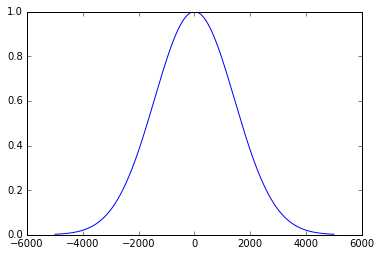

In [37]:
%matplotlib inline
env0 = exp (- t_n * t_n / (2 * width * width))
plot(t_n, env0)

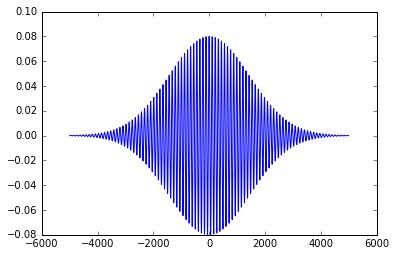

In [38]:
E0 = E_0 * env0 * cos (omega_0 * t_n)
plot(t_n,E0)

定义谐波电场$E_1$，谐波电场强度$0.01\ a.u.$

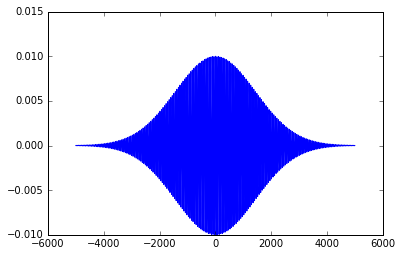

In [39]:
E_1 = 0.01
omega_1 = 0.114
env1 = exp (- t_n * t_n / (2 * width * width))
E1 = E_1 * env1 * cos (omega_1 * t_n)
plot(t_n, E1)

###### $W_a = 4.13 \times 10^{16} \ s^{-1}$ 需要换算为原子单位，$W_a\ (in\ a.u.) = 4.13\times10^{16}\ s^{-1}\times2.4189\times10^{-17}$

In [40]:
W_a = 4.13 * 10.0**16 * 2.4189 * 10.0**(-17)
W_a

0.9990057000000001

$E_a = 1.0\ a.u.$

In [41]:
E_a = 1.0

电场强度为基频光和倍频光相加$E_0+E_1$

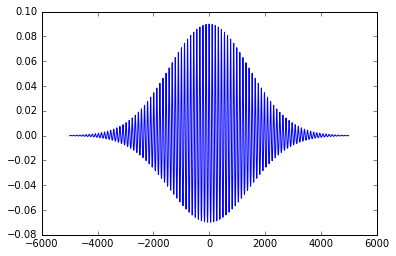

In [42]:
E = E0 + E1
plot(t_n, E)

计算电离率时，需要在电场前加一个0.000001，防止被除数为零。
电离率经验公式$W(E)=4W_a\frac{E_a}{E}exp(-\frac{2}{3}\frac{E_a}{E}-12\frac{E}{E_a})$

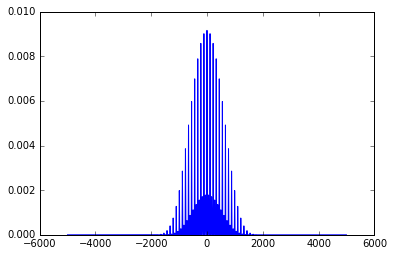

In [43]:
temp = 0.0000001 + abs (E)
W = 4.0 / abs(temp) * exp(-(2.0/3.0) / abs (temp) - 12.0 * abs (temp))
plot(t_n,W)

$N_g=2.4\times10^{19}cm^{-3}$需要换算为原子单位

In [44]:
N_g = 2.4 * 10 ** 19 * (0.5292 * 10 ** (-8)) ** 3
N_g

3.5568925701120003e-06

求解微分方程$\frac{\partial N}{\partial t}=(N_g-N)W(E)$

In [45]:
W.size

5000

In [46]:
N = zeros(W.size, float)
N

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

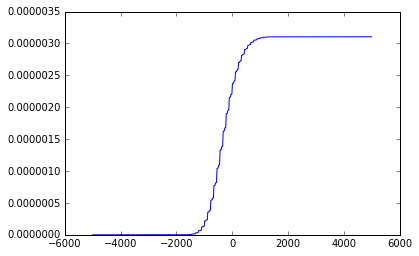

In [47]:
for i in xrange(W.size - 1):
    N[i+1] = N[i] + (N_g - N[i]) * W[i] * 2
plot(t_n, N)

求解$\frac{\partial J}{\partial t}=\frac{e^2}{m}NE$

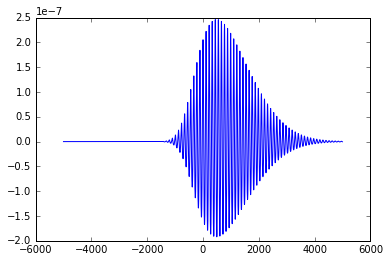

In [48]:
dJ_dt = N * E
plot (t_n, dJ_dt)

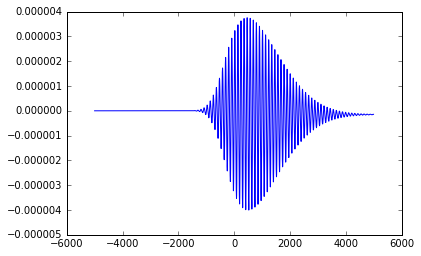

In [49]:
J = zeros(W.size, float)
for i in xrange(W.size - 1):
    J[i + 1] = J[i] + dJ_dt[i] * 2
plot (t_n, J)

[2000, 3000, 0, 0.00012]

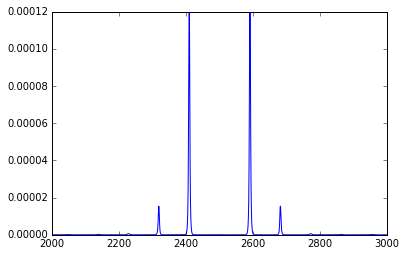

In [50]:
from scipy.fftpack import fft, fftshift
A_thz = fftshift(fft (dJ_dt))
plot(abs(A_thz))
axis([2000,3000,0,0.00012])

提高光谱的分辨率，需要补零

In [52]:
dJ_dt_Ext = zeros(W.size * 16, float)
dJ_dt_Ext[37500:42500] = dJ_dt
dJ_dt_Ext

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

[39500, 40500, 0, 2e-06]

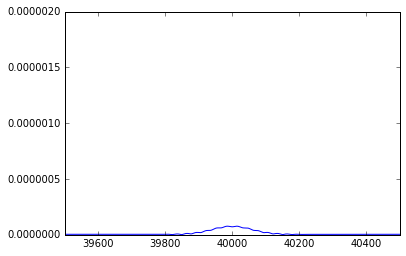

In [55]:
A = fftshift(fft (dJ_dt_Ext))
plot(abs(A))
axis([39500,40500,0,0.000002])

坐标为...THz

In [58]:
1 / (5000.0 * 16.0 / 41.0) * 1000

0.5125000000000001